In [6]:
import numpy as np
import pandas as pd
import missingno as msno
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns # Data visualization 
import matplotlib.pyplot as plt # Data visualization 
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score ,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE    

from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
heart_diases=pd.read_csv('Heart1.csv')
df=heart_diases.copy()

In [18]:
df.sample(5)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
4302,31.0,Male,138.0,292.0,Low,No,No,Yes,38.414723,Yes,...,No,NaN,Medium,9.349915,Low,297.0,98.0,9.857326,11.136981,No
8649,39.0,Male,148.0,220.0,High,No,No,No,35.151079,Yes,...,No,Medium,Medium,7.001021,High,293.0,142.0,12.976823,13.825870,Yes
4151,44.0,Male,174.0,242.0,Medium,No,No,Yes,20.559335,No,...,Yes,NaN,Medium,5.326728,High,276.0,132.0,8.466270,10.829722,No
3796,24.0,Female,126.0,192.0,High,No,No,No,35.045257,No,...,No,Low,Medium,8.274059,Low,185.0,125.0,9.413423,6.645668,No
8419,67.0,Female,124.0,182.0,Low,No,No,Yes,32.838204,Yes,...,No,Low,Medium,8.170638,High,122.0,104.0,4.881733,7.797556,Yes


In [5]:
df.dtypes

Age                     float64
Gender                   object
Blood Pressure          float64
Cholesterol Level       float64
Exercise Habits          object
Smoking                  object
Family Heart Disease     object
Diabetes                 object
BMI                     float64
High Blood Pressure      object
Low HDL Cholesterol      object
High LDL Cholesterol     object
Alcohol Consumption      object
Stress Level             object
Sleep Hours             float64
Sugar Consumption        object
Triglyceride Level      float64
Fasting Blood Sugar     float64
CRP Level               float64
Homocysteine Level      float64
Heart Disease Status     object
dtype: object

In [6]:
df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [7]:
df.iloc[:5,10:11] # invisible coloums

,Low HDL Cholesterol
0,Yes
1,Yes
2,Yes
3,No
4,No


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9971.0,49.296259,18.193970,18.000000,34.000000,49.000000,65.000000,80.000000
Blood Pressure,9981.0,149.757740,17.572969,120.000000,134.000000,150.000000,165.000000,180.000000
Cholesterol Level,9970.0,225.425577,43.575809,150.000000,187.000000,226.000000,263.000000,300.000000
BMI,9978.0,29.077269,6.307098,18.002837,23.658075,29.079492,34.520015,39.996954
Sleep Hours,9975.0,6.991329,1.753195,4.000605,5.449866,7.003252,8.531577,9.999952
Triglyceride Level,9974.0,250.734409,87.067226,100.000000,176.000000,250.000000,326.000000,400.000000
Fasting Blood Sugar,9978.0,120.142213,23.584011,80.000000,99.000000,120.000000,141.000000,160.000000
CRP Level,9974.0,7.472201,4.340248,0.003647,3.674126,7.472164,11.255592,14.997087
Homocysteine Level,9980.0,12.456271,4.323426,5.000236,8.723334,12.409395,16.140564,19.999037


In [9]:
df.shape

(10000, 21)

### The difference b/t classes 

In [10]:
df['Gender'].value_counts()

Gender
Male      5003
Female    4978
Name: count, dtype: int64

In [11]:
df['Smoking'].value_counts().isnull()

Smoking
Yes    False
No     False
Name: count, dtype: bool

In [12]:
df['Family Heart Disease'].value_counts()

Family Heart Disease
No     5004
Yes    4975
Name: count, dtype: int64

In [13]:
df["Stress Level"].value_counts()

Stress Level
Medium    3387
Low       3320
High      3271
Name: count, dtype: int64

## Outlier Dedection and Missing Data

In [14]:
df.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [15]:
df.isnull().sum()/len(df)*100

Age                      0.29
Gender                   0.19
Blood Pressure           0.19
Cholesterol Level        0.30
Exercise Habits          0.25
Smoking                  0.25
Family Heart Disease     0.21
Diabetes                 0.30
BMI                      0.22
High Blood Pressure      0.26
Low HDL Cholesterol      0.25
High LDL Cholesterol     0.26
Alcohol Consumption     25.86
Stress Level             0.22
Sleep Hours              0.25
Sugar Consumption        0.30
Triglyceride Level       0.26
Fasting Blood Sugar      0.22
CRP Level                0.26
Homocysteine Level       0.20
Heart Disease Status     0.00
dtype: float64

In [16]:
# total missing value
df.isnull().sum().sum()

np.int64(3054)

<Axes: >

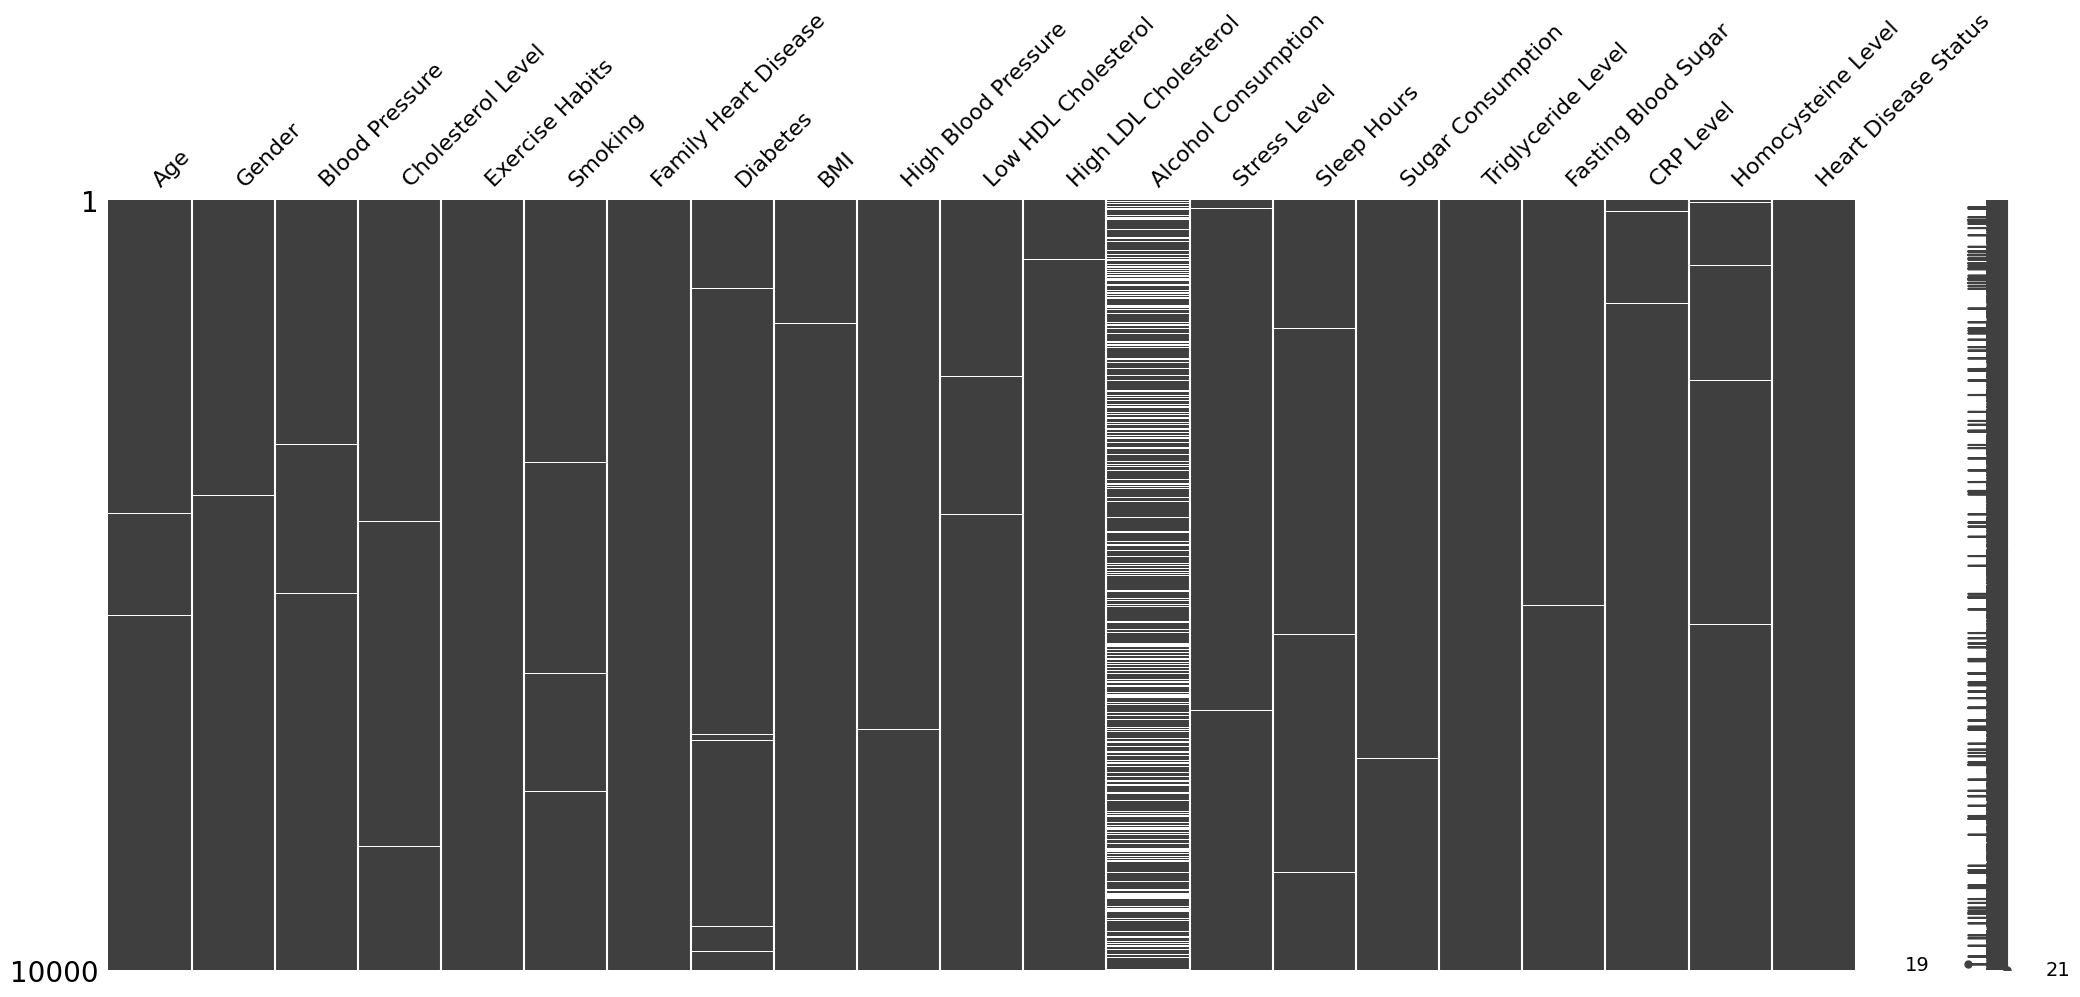

In [17]:
msno.matrix(df)

<Axes: >

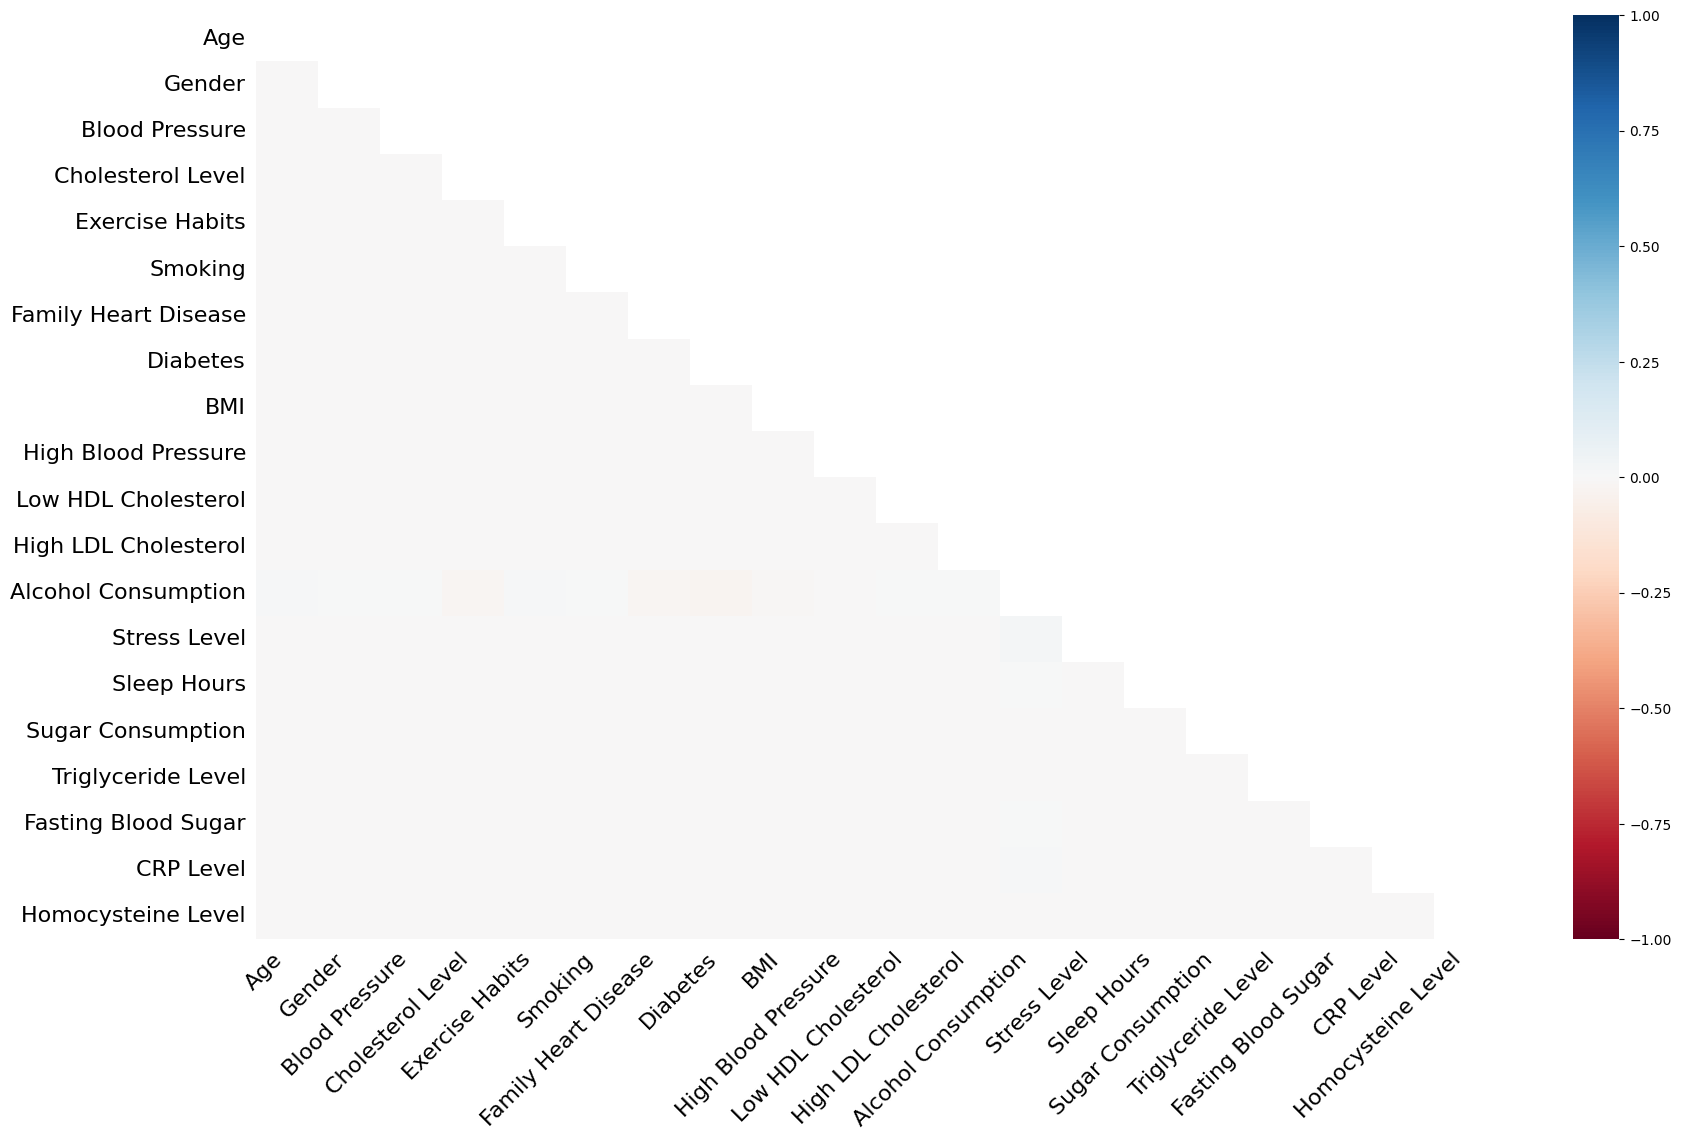

In [18]:
msno.heatmap(df)

 - Missing it is obvserved that there is no relationship between the data


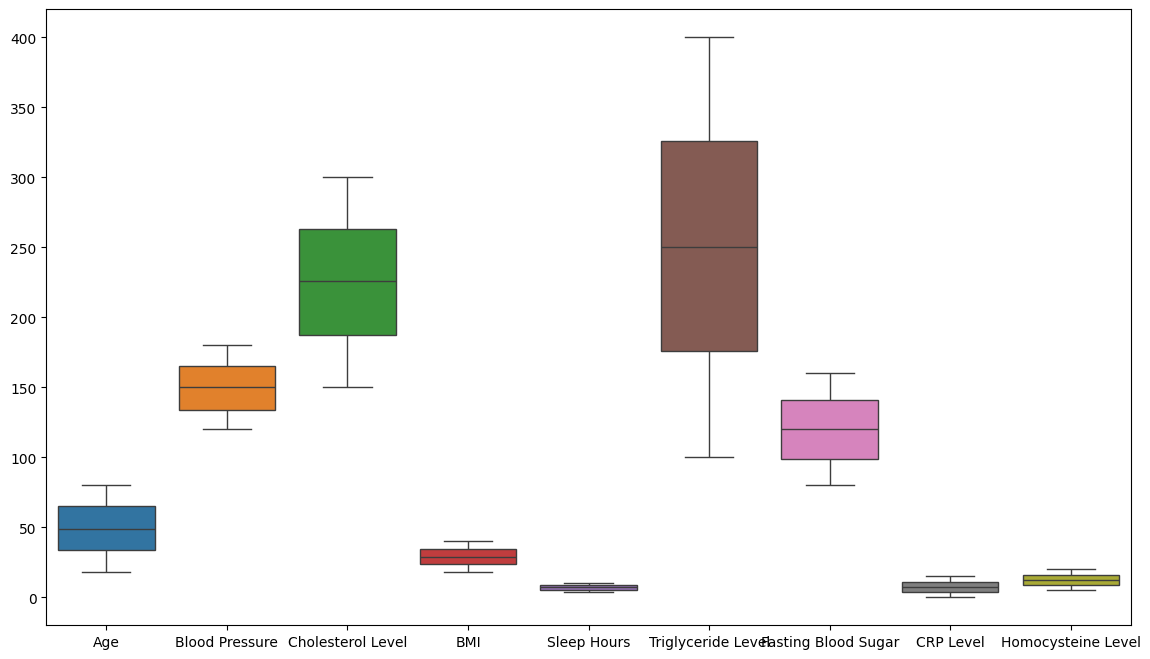

In [19]:
plt.figure(figsize=(14,8))
sns.boxplot(df)
plt.show()

- There` are no outlier dedections

## Exploratory Data Analysis

In [20]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


## The Analysis of Categorical Variables

- Which Categorical Variables are Imbalance 

In [21]:
cat_df = df.select_dtypes(include = ["object"])
cat_df.nunique()

Gender                  2
Exercise Habits         3
Smoking                 2
Family Heart Disease    2
Diabetes                2
High Blood Pressure     2
Low HDL Cholesterol     2
High LDL Cholesterol    2
Alcohol Consumption     3
Stress Level            3
Sugar Consumption       3
Heart Disease Status    2
dtype: int64

In [22]:
for col in cat_df.columns:
    print(f"Column : {col}")
    print(cat_df[col].value_counts(),end = "\n\n")

Column : Gender
Gender
Male      5003
Female    4978
Name: count, dtype: int64

Column : Exercise Habits
Exercise Habits
High      3372
Medium    3332
Low       3271
Name: count, dtype: int64

Column : Smoking
Smoking
Yes    5123
No     4852
Name: count, dtype: int64

Column : Family Heart Disease
Family Heart Disease
No     5004
Yes    4975
Name: count, dtype: int64

Column : Diabetes
Diabetes
No     5018
Yes    4952
Name: count, dtype: int64

Column : High Blood Pressure
High Blood Pressure
Yes    5022
No     4952
Name: count, dtype: int64

Column : Low HDL Cholesterol
Low HDL Cholesterol
Yes    5000
No     4975
Name: count, dtype: int64

Column : High LDL Cholesterol
High LDL Cholesterol
No     5036
Yes    4938
Name: count, dtype: int64

Column : Alcohol Consumption
Alcohol Consumption
Medium    2500
Low       2488
High      2426
Name: count, dtype: int64

Column : Stress Level
Stress Level
Medium    3387
Low       3320
High      3271
Name: count, dtype: int64

Column : Sugar Consum

### Data Set General Evaluation

- In our dataset distribution of indepented values balance however target value = "Heart Disease Status" is imbalance this rate is %20 - %80"

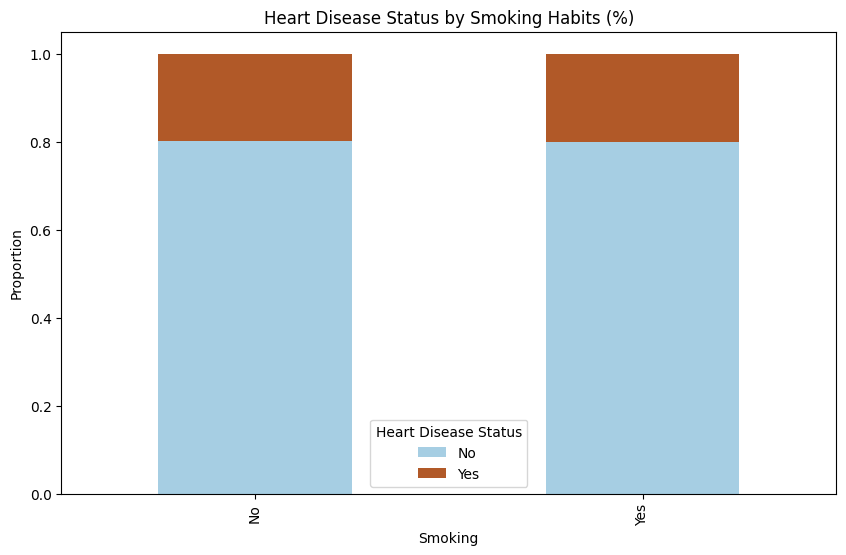

In [23]:
df.groupby("Smoking")["Heart Disease Status"].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(10,6), colormap="Paired")

plt.title("Heart Disease Status by Smoking Habits (%)")
plt.ylabel("Proportion")
plt.xlabel("Smoking")
plt.legend(title="Heart Disease Status")
plt.show()

In [24]:
df.groupby("Smoking")["Heart Disease Status"].value_counts(normalize=True).unstack()

Heart Disease Status,No,Yes
Smoking,,
No,0.801113,0.198887
Yes,0.799141,0.200859


- The countplot shows that the proportion of heart disease among smokers and non-smokers is nearly the same.
- The grouped bar plot and stacked bar plot confirm that the difference between smokers and non-smokers in terms of heart disease is minimal.
- According to the normalized proportions, about 20% of both smokers and non-smokers have heart disease, while 80% do not.
- This suggests that smoking alone may not be a strong predictor of heart disease in this dataset.

## Does exercise level influence heart disease?

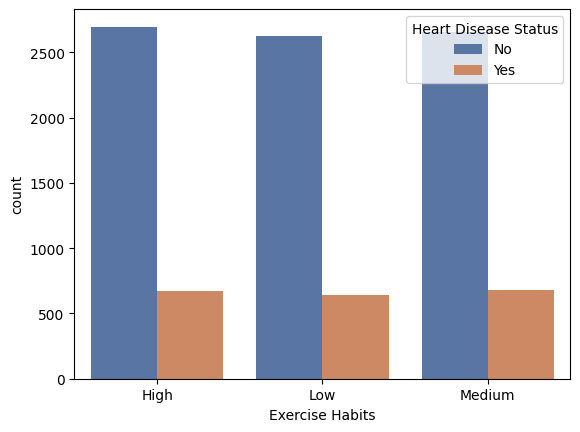

In [25]:
sns.countplot(data = df,x = "Exercise Habits",hue = "Heart Disease Status",palette = "deep")
plt.show()

- The countplot shows that the proportion of heart disease cases is fairly similar across all exercise levels (High, Medium, and Low).
- There doesn’t seem to be a clear trend suggesting that individuals who exercise more have a significantly lower risk of heart disease.

### Are individuals with a family history of heart disease at higher risk?

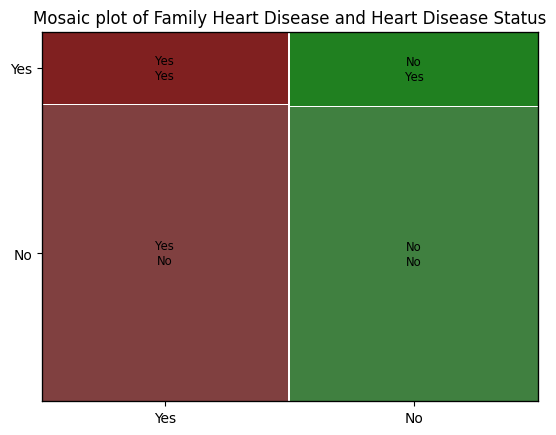

In [26]:
mosaic(data = df, index = ["Family Heart Disease","Heart Disease Status"])
plt.title("Mosaic plot of Family Heart Disease and Heart Disease Status")
plt.show()

- The mosaic plot shows that the proportion of heart disease cases among individuals with and without a family history of heart disease is almost equal.

###  Are individuals with high stress levels more prone to heart disease?

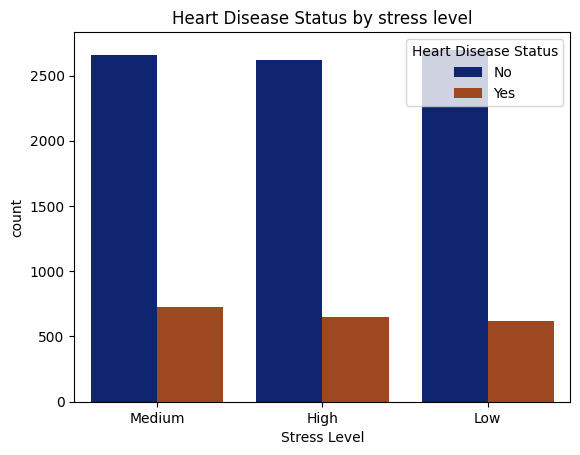

In [27]:
sns.countplot(data=df,x='Stress Level',hue='Heart Disease Status',palette='dark')
plt.title("Heart Disease Status by stress level")
plt.show()

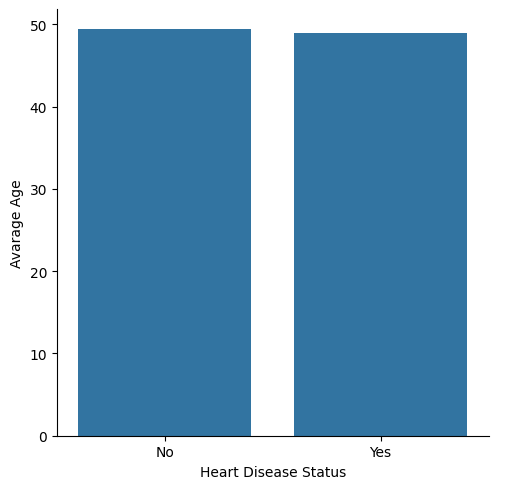

In [28]:
heart_group_age_mean = df.groupby("Heart Disease Status")["Age"].mean().reset_index()
sns.catplot(data= heart_group_age_mean, x= "Heart Disease Status",y = "Age",kind = "bar")
plt.ylabel("Avarage Age")
plt.show()

## Does blood pressure affect heart disease?

In [29]:
grouped= df.groupby("Heart Disease Status")["Blood Pressure"]
heart_disease_yes = grouped.get_group("Yes")
heart_disease_no = grouped.get_group("No")

heart_disease_no_sampled = heart_disease_no.sample(n=len(heart_disease_yes), random_state=42)
yes_no = pd.DataFrame({
    "Yes": heart_disease_yes.values, 
    "No": heart_disease_no_sampled.values
})
yes_no = yes_no.dropna()

In [30]:
statistic , pvalue = stats.shapiro(yes_no.Yes)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic , pvalue = stats.shapiro(yes_no.No)
print('statistic = %.4f, p-value = %.4f' % (statistic ,pvalue))

statistic = 0.9538, p-value = 0.0000
statistic = 0.9525, p-value = 0.0000


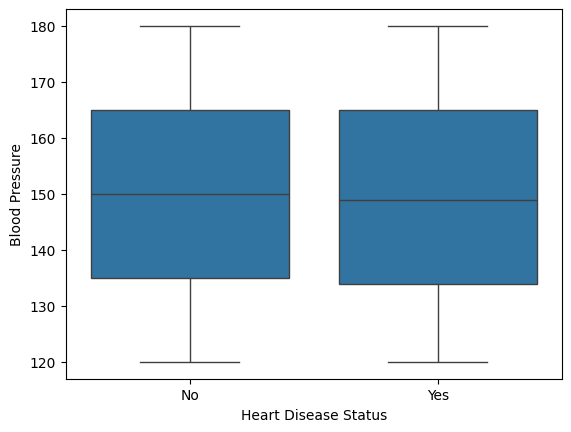

In [31]:
sns.boxplot(data = df, x= "Heart Disease Status",y="Blood Pressure")
plt.show()

### Exploratory Analysis:

- A boxplot was created to visualize the distribution of blood pressure across individuals with and without heart disease.
- The boxplot suggests that there is no significant difference in blood pressure levels between the two groups. The median and interquartile ranges appear to be nearly identical.

## Correlation Analysis

In [32]:
num_col= ["Age","Blood Pressure","Cholesterol Level","BMI","Sleep Hours","Triglyceride Level","Fasting Blood Sugar","CRP Level","Homocysteine Level"]

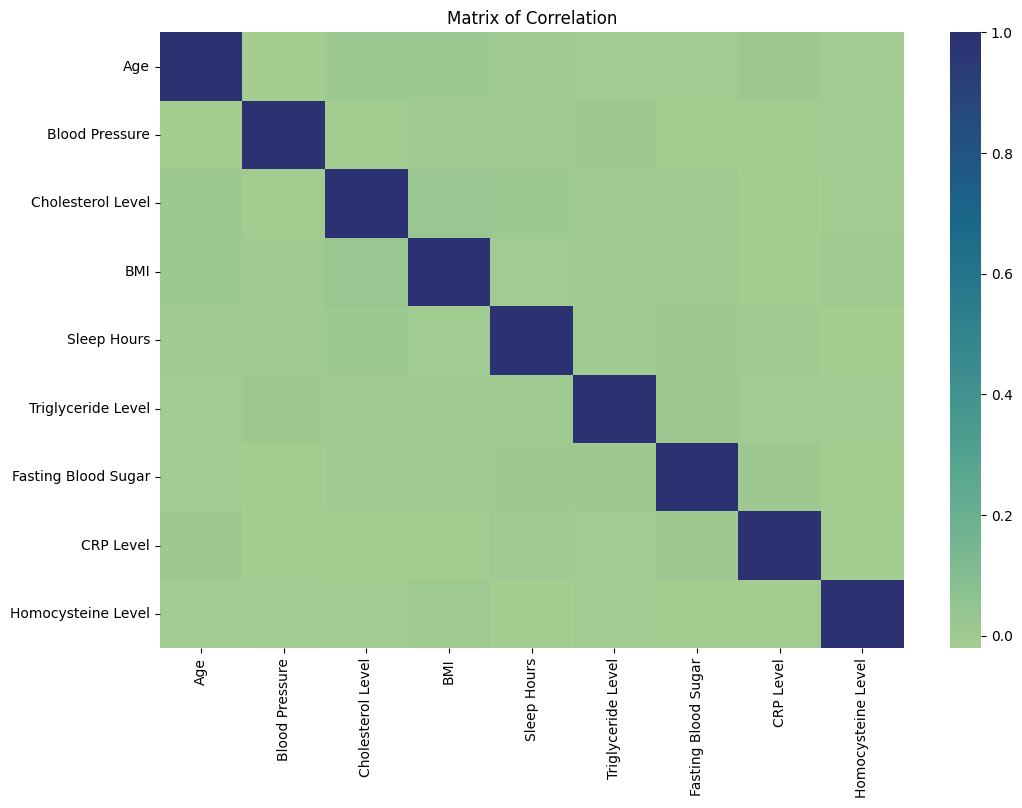

In [33]:
corr_df = df[num_col].corr()
plt.figure(figsize =(12,8))
sns.heatmap(corr_df,cmap ="crest")
plt.title("Matrix of Correlation")
plt.show()

### Correlation Matrix:

- No significant correlation is observed between the variables. There is no clear linear relationship between any pair of variables

## Train Test Split

In [127]:
x=df.drop(['Heart Disease Status'],axis=1)
y=df['Heart Disease Status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [129]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8000, 20) (2000, 20) (8000,) (2000,)


In [36]:
x_train.head(2)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
9254,78.0,Male,140.0,289.0,High,Yes,Yes,No,25.086206,Yes,Yes,No,Low,High,9.024681,Medium,222.0,137.0,14.481422,11.320909
1561,64.0,Male,143.0,203.0,Low,Yes,Yes,Yes,23.791361,Yes,Yes,No,High,Medium,6.543419,Medium,188.0,111.0,6.485267,15.761419


In [37]:
x_test.sample(2)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
7398,75.0,Female,152.0,280.0,Low,No,No,Yes,24.952532,Yes,Yes,Yes,NaN,Low,6.852192,Low,116.0,114.0,8.749110,16.768011
5331,54.0,Female,150.0,174.0,Medium,No,Yes,Yes,39.773162,Yes,No,No,Low,High,6.772480,Low,394.0,107.0,9.571638,5.744576


In [38]:
y_train.head()

9254    Yes
1561     No
1670     No
6087     No
6669     No
Name: Heart Disease Status, dtype: object

In [39]:
y_test.head()

6252    No
4684    No
1731    No
4742    No
4521    No
Name: Heart Disease Status, dtype: object

In [75]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Heart Disease Status
No     0.798375
Yes    0.201625
Name: proportion, dtype: float64
Heart Disease Status
No     0.8065
Yes    0.1935
Name: proportion, dtype: float64


## Feature Engineering

## Feature Encoding

#### Feature Scaling

In [130]:
numeric_cols = x_train.select_dtypes(include=["float64", "int64"]).columns.tolist()

#scaler = StandardScaler()
#x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols]  )
#x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])

In [131]:
categorical_cols = x_train.select_dtypes(include=["object"]).columns.tolist()
#pref = ["Gen","Exercise","Smok","Family","Dia","HighB","LowHDL","HighLDL","Alch","Stress","Sugar"]

#x_train = pd.get_dummies(data = x_train ,columns =  categorical_cols, prefix = pref,drop_first = True)
#x_test = pd.get_dummies(data = x_test ,columns = categorical_cols ,prefix = pref,drop_first = True)

#bool_columns = x_train.select_dtypes(include = "bool").columns
#x_train[bool_columns] = x_train[bool_columns].astype(int)

#bool_columns = x_test.select_dtypes(include = "bool").columns
#x_test[bool_columns] = x_test[bool_columns].astype(int)

In [133]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

In [134]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [135]:
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

In [81]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_cols),
    ('num', numeric_transformer, numeric_cols)
])


In [136]:
x_train_column=x_train.columns

In [51]:
x_train.shape

(8000, 26)

In [82]:
x_test.head(2)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
6252,38.0,Male,169.0,156.0,Medium,Yes,No,Yes,35.303549,No,No,Yes,Medium,High,4.213721,Medium,321.0,158.0,9.778347,17.400056
4684,77.0,Female,174.0,280.0,Medium,Yes,Yes,No,29.792178,Yes,No,Yes,NaN,Medium,5.081128,Medium,312.0,80.0,14.370456,8.724180


## Missing Data

In [83]:
x_train.isnull().sum()

Age                       25
Gender                    14
Blood Pressure            16
Cholesterol Level         25
Exercise Habits           19
Smoking                   19
Family Heart Disease      17
Diabetes                  21
BMI                       16
High Blood Pressure       18
Low HDL Cholesterol       17
High LDL Cholesterol      21
Alcohol Consumption     2083
Stress Level              17
Sleep Hours               22
Sugar Consumption         26
Triglyceride Level        22
Fasting Blood Sugar       12
CRP Level                 18
Homocysteine Level        16
dtype: int64

In [84]:
x_train.isnull().sum()/len(df)*100

Age                      0.25
Gender                   0.14
Blood Pressure           0.16
Cholesterol Level        0.25
Exercise Habits          0.19
Smoking                  0.19
Family Heart Disease     0.17
Diabetes                 0.21
BMI                      0.16
High Blood Pressure      0.18
Low HDL Cholesterol      0.17
High LDL Cholesterol     0.21
Alcohol Consumption     20.83
Stress Level             0.17
Sleep Hours              0.22
Sugar Consumption        0.26
Triglyceride Level       0.22
Fasting Blood Sugar      0.12
CRP Level                0.18
Homocysteine Level       0.16
dtype: float64

In [85]:
x_test.isnull().sum()

Age                       4
Gender                    5
Blood Pressure            3
Cholesterol Level         5
Exercise Habits           6
Smoking                   6
Family Heart Disease      4
Diabetes                  9
BMI                       6
High Blood Pressure       8
Low HDL Cholesterol       8
High LDL Cholesterol      5
Alcohol Consumption     503
Stress Level              5
Sleep Hours               3
Sugar Consumption         4
Triglyceride Level        4
Fasting Blood Sugar      10
CRP Level                 8
Homocysteine Level        4
dtype: int64

In [86]:
x_test.isnull().sum()/len(df)*100

Age                     0.04
Gender                  0.05
Blood Pressure          0.03
Cholesterol Level       0.05
Exercise Habits         0.06
Smoking                 0.06
Family Heart Disease    0.04
Diabetes                0.09
BMI                     0.06
High Blood Pressure     0.08
Low HDL Cholesterol     0.08
High LDL Cholesterol    0.05
Alcohol Consumption     5.03
Stress Level            0.05
Sleep Hours             0.03
Sugar Consumption       0.04
Triglyceride Level      0.04
Fasting Blood Sugar     0.10
CRP Level               0.08
Homocysteine Level      0.04
dtype: float64

In [87]:
(df.isnull().sum()/ len(df)) * 100

Age                      0.29
Gender                   0.19
Blood Pressure           0.19
Cholesterol Level        0.30
Exercise Habits          0.25
Smoking                  0.25
Family Heart Disease     0.21
Diabetes                 0.30
BMI                      0.22
High Blood Pressure      0.26
Low HDL Cholesterol      0.25
High LDL Cholesterol     0.26
Alcohol Consumption     25.86
Stress Level             0.22
Sleep Hours              0.25
Sugar Consumption        0.30
Triglyceride Level       0.26
Fasting Blood Sugar      0.22
CRP Level                0.26
Homocysteine Level       0.20
Heart Disease Status     0.00
dtype: float64

## Overview of Missing Data:

- A detailed analysis of missing data was conducted on the dataset. The findings indicate that:

- The missing data percentage ranges between 0.19% and 0.30% for most features.

- The 'Alcohol Consumption' column has a significantly higher missing data percentage (25.86%), which is approximately one-fourth of the dataset.

- No evident correlation was found between missing values and other variables.

- There are no outliers in the dataset that could distort the missing data imputation process.

In [88]:
x_train.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
9254,78.0,Male,140.0,289.0,High,Yes,Yes,No,25.086206,Yes,Yes,No,Low,High,9.024681,Medium,222.0,137.0,14.481422,11.320909
1561,64.0,Male,143.0,203.0,Low,Yes,Yes,Yes,23.791361,Yes,Yes,No,High,Medium,6.543419,Medium,188.0,111.0,6.485267,15.761419
1670,18.0,Female,147.0,161.0,Low,Yes,Yes,Yes,37.100070,No,No,No,High,High,4.612469,Low,259.0,123.0,3.383982,14.664906
6087,24.0,Female,145.0,195.0,Medium,Yes,No,No,23.917206,Yes,No,No,NaN,Medium,4.964663,High,175.0,101.0,9.998831,14.296107
6669,49.0,Male,157.0,291.0,Medium,Yes,No,Yes,22.477665,Yes,No,Yes,NaN,Low,7.810732,Medium,261.0,99.0,3.111362,15.257110


In [125]:
(x_train.isnull().sum()/ len(df)) * 100

Age                      0.25
Gender                   0.14
Blood Pressure           0.16
Cholesterol Level        0.25
Exercise Habits          0.19
Smoking                  0.19
Family Heart Disease     0.17
Diabetes                 0.21
BMI                      0.16
High Blood Pressure      0.18
Low HDL Cholesterol      0.17
High LDL Cholesterol     0.21
Alcohol Consumption     20.83
Stress Level             0.17
Sleep Hours              0.22
Sugar Consumption        0.26
Triglyceride Level       0.22
Fasting Blood Sugar      0.12
CRP Level                0.18
Homocysteine Level       0.16
dtype: float64

In [137]:
print(x_test.isnull().sum())
print("----------------------------------------")
print(x_train.isnull().sum())

Age                       4
Gender                    5
Blood Pressure            3
Cholesterol Level         5
Exercise Habits           6
Smoking                   6
Family Heart Disease      4
Diabetes                  9
BMI                       6
High Blood Pressure       8
Low HDL Cholesterol       8
High LDL Cholesterol      5
Alcohol Consumption     503
Stress Level              5
Sleep Hours               3
Sugar Consumption         4
Triglyceride Level        4
Fasting Blood Sugar      10
CRP Level                 8
Homocysteine Level        4
dtype: int64
----------------------------------------
Age                       25
Gender                    14
Blood Pressure            16
Cholesterol Level         25
Exercise Habits           19
Smoking                   19
Family Heart Disease      17
Diabetes                  21
BMI                       16
High Blood Pressure       18
Low HDL Cholesterol       17
High LDL Cholesterol      21
Alcohol Consumption     2083
Stress Le

## Machine Learning

In [91]:
x_train.head(5)

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
9254,78.0,Male,140.0,289.0,High,Yes,Yes,No,25.086206,Yes,Yes,No,Low,High,9.024681,Medium,222.0,137.0,14.481422,11.320909
1561,64.0,Male,143.0,203.0,Low,Yes,Yes,Yes,23.791361,Yes,Yes,No,High,Medium,6.543419,Medium,188.0,111.0,6.485267,15.761419
1670,18.0,Female,147.0,161.0,Low,Yes,Yes,Yes,37.100070,No,No,No,High,High,4.612469,Low,259.0,123.0,3.383982,14.664906
6087,24.0,Female,145.0,195.0,Medium,Yes,No,No,23.917206,Yes,No,No,NaN,Medium,4.964663,High,175.0,101.0,9.998831,14.296107
6669,49.0,Male,157.0,291.0,Medium,Yes,No,Yes,22.477665,Yes,No,Yes,NaN,Low,7.810732,Medium,261.0,99.0,3.111362,15.257110


## Logistic Regression

In [92]:

# Full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [93]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Exercise Habits',
                                                   'Smoking',
                                                   'Family Heart Disease',
                                                   'Diabetes',
                                                   'High Blood Pressure',
                                                   'Low HDL Cholesterol',
                                                   'High LDL Cholesterol',
                                                   'Alcohol Consumption',
                                                   'Stress Level',
                                                   'Sugar Consumption']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Blood Pressure',
                                                   'Cholesterol Level', 'BMI',
                                                   'Sleep Hours',
                                                   'Triglyceride Level',
                                                   'Fasting Blood Sugar',
                                                   'CRP Level',
                                                   'Homocysteine Level'])])),
                ('classifier', LogisticRegression())])

In [95]:
y_pred=pipeline.predict(x_test)

In [96]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'],
      shape=(2000,), dtype=object)

In [97]:
print('Accuracy score ',accuracy_score(y_test,y_pred))

Accuracy score  0.8065


In [98]:
cross_val_score(pipeline, x_test, y_test, cv = 10 ).mean()

np.float64(0.806)

## Random Forest

In [99]:

# Full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('randomforest', RandomForestClassifier(n_estimators=100,random_state=42))
])

In [101]:
pipeline.fit(x_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Exercise Habits',
                                                   'Smoking',
                                                   'Family Heart Disease',
                                                   'Diabetes',
                                                   'High Blood Pressure',
                                                   'Low HDL Cholesterol',
                                                   'High LDL Cholesterol',
                                                   'Alcohol Consumption',
                                                   'Stress Level',
                                                   'Sugar Consumption']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Blood Pressure',
                                                   'Cholesterol Level', 'BMI',
                                                   'Sleep Hours',
                                                   'Triglyceride Level',
                                                   'Fasting Blood Sugar',
                                                   'CRP Level',
                                                   'Homocysteine Level'])])),
                ('randomforest', RandomForestClassifier(random_state=42))])

## model evaluation

In [102]:
y_pred=pipeline.predict(x_test)

In [103]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8065


In [104]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[1613    0]
 [ 387    0]]


In [105]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

          No       0.81      1.00      0.89      1613
         Yes       0.00      0.00      0.00       387

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000



### Naive Bayes¶
- Model Introduction N
- Why Naive Bayes?
      Naive Bayes is one of the simplest yet surprisingly powerful classification algorithms based on Bayes' Theorem. Despite its simplicity, it performs remarkably well in many real-world situations.

In [ ]:
Naive_model = GaussianNB().fit(x_train,y_train)

In [ ]:
Naive_model.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [ ]:
Naive_model.predict_proba(x_test)

array([[0.80008163, 0.19991837],
       [0.78494784, 0.21505216],
       [0.84194966, 0.15805034],
       ...,
       [0.82483468, 0.17516532],
       [0.74277282, 0.25722718],
       [0.79206893, 0.20793107]], shape=(2000, 2))

In [ ]:
y_pred = Naive_model.predict(x_test)

In [ ]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'],
      shape=(2000,), dtype='<U3')

## Performance Metrics N

In [ ]:
accuracy_score(y_test, y_pred) 

0.8065

In [ ]:
cross_val_score(Naive_model , x_test, y_test, cv = 10 ).mean()

np.float64(0.8065)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.81      1.00      0.89      1613
         Yes       0.00      0.00      0.00       387

    accuracy                           0.81      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.81      0.72      2000



### ROC Curve and Confusion Matrix N

In [ ]:
confusion_matrix(y_test,y_pred)

array([[1613,    0],
       [ 387,    0]])

In [ ]:
le = LabelEncoder()
y_test_encode = le.fit_transform(y_test)
y_pred_encode = le.transform(Naive_model.predict(x_test))

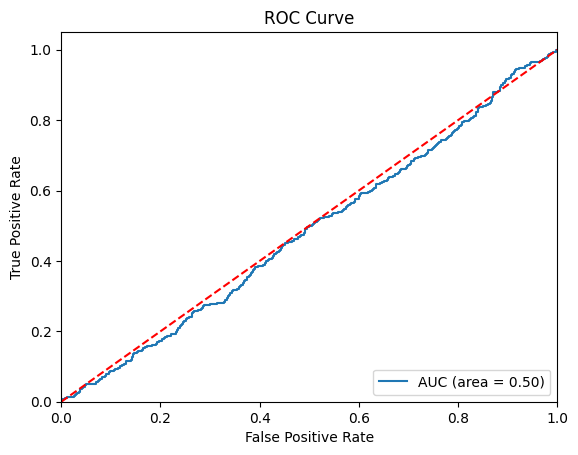

In [ ]:
naive_roc_auc = roc_auc_score(y_test_encode, y_pred_encode)

fpr, tpr, thresholds = roc_curve(y_test_encode, Naive_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = "AUC (area = %0.2f)" % naive_roc_auc)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

### Performance Metrics
-   Accuracy: 0.8065
-   Cross-Validation Score (10-Fold): 0.806
-   Precision (No / Yes): 0.81 / 0.00
-   Recall (No / Yes): 1.00 / 0.00
-   F1-Score (No / Yes): 0.89 / 0.00
-   Support (No / Yes): 1613 / 387

### ROC Curve & Confusion Matrix
- ROC AUC Score: 0.50
- ROC Curve: Indicates random guessing
- Confusion Matrix:

## SVC model

In [ ]:
Svc_model = SVC(kernel = "rbf" , class_weight = "balanced",probability = True).fit(x_train,y_train)

In [ ]:
Svc_model.predict_proba(x_test)

array([[0.79824722, 0.20175278],
       [0.79827378, 0.20172622],
       [0.79843381, 0.20156619],
       ...,
       [0.79838411, 0.20161589],
       [0.79836153, 0.20163847],
       [0.79835981, 0.20164019]], shape=(2000, 2))

In [ ]:
y_pred = Svc_model.predict(x_test)

In [ ]:
y_pred

array(['Yes', 'Yes', 'No', ..., 'No', 'No', 'No'],
      shape=(2000,), dtype=object)

### Performance Metrics 

In [ ]:
accuracy_score(y_test,y_pred) 

0.555

In [ ]:
cross_val_score(Svc_model , x_test, y_test, cv = 10 ).mean()

np.float64(0.6045)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.81      0.59      0.68      1613
         Yes       0.20      0.43      0.27       387

    accuracy                           0.56      2000
   macro avg       0.50      0.51      0.48      2000
weighted avg       0.69      0.56      0.60      2000



In [ ]:
confusion_matrix(y_test,y_pred)

array([[944, 669],
       [221, 166]])

### conculision

- Although the SVC model provided improved F1-Score and Recall metrics compared to Naive Bayes, the overall model performance is still unsatisfactory. The ROC-AUC score remains close to 0.50, indicating that the model is no better than random guessing in distinguishing between the positive and negative classes.

## XGBoost

In [108]:
y_train = y_train.map({'No': 0, 'Yes': 1})
y_test = y_test.map({'No': 0, 'Yes': 1})

In [109]:
xgb_model = XGBClassifier(
    scale_pos_weight=1,  # SMOTE sonrası gerekmez
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)


# Full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgboost', xgb_model)
])

In [110]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Exercise Habits',
                                                   'Smoking',
                                                   'Family Heart Disease',
                                                   'Diabetes',
                                                   'High Blood Pressure',
                                                   'Low HDL Cholesterol',
                                                   'High LDL Cholesterol',
                                                   'Alcohol Consumption',
                                                   'Stress Level',
                                                   'Sugar Consumption']),
                                                 ('num',
                                                  Pipeline(steps=[('...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [114]:
x_test=preprocessor.fit_transform(x_test)

In [115]:
y_pred = xgb_model.predict(x_test)

In [117]:
accuracy_score(y_test,y_pred) 

0.788

In [118]:
cross_val_score(xgb_model , x_test, y_test, cv = 10).mean()

np.float64(0.7870000000000001)

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1613
           1       0.22      0.04      0.06       387

    accuracy                           0.79      2000
   macro avg       0.51      0.50      0.47      2000
weighted avg       0.69      0.79      0.72      2000



### ROC Curve and Confusion Matrix X

In [120]:
confusion_matrix(y_test,y_pred)

array([[1562,   51],
       [ 373,   14]])

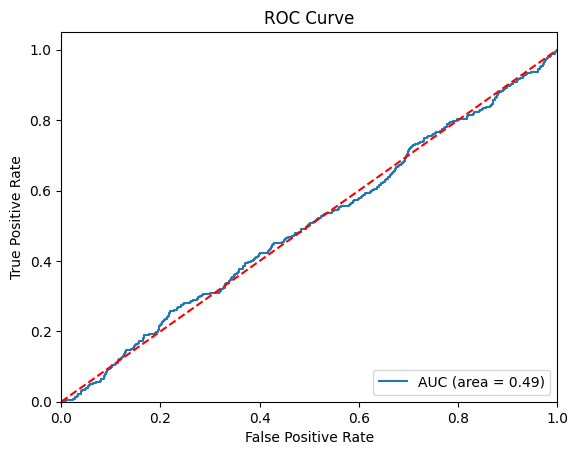

In [ ]:
Xgb_roc_auc = roc_auc_score(y_test_encode, y_pred_encode)

fpr, tpr, thresholds = roc_curve(y_test_encode, xgb_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = "AUC (area = %0.2f)" % Xgb_roc_auc)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

## Conculision

- Despite being one of the most powerful ensemble methods, XGBoost did not perform as expected in our dataset. Although it showed decent accuracy (77.95%) and cross-validation score (78.45%), the ROC AUC score (0.50) clearly indicated that the model fails to differentiate between classes better than random chance.
- Thus, although XGBoost is theoretically a strong model, in this context, it struggled due to class imbalance and possibly insufficient feature signal strength

## models acccuracy comprasions

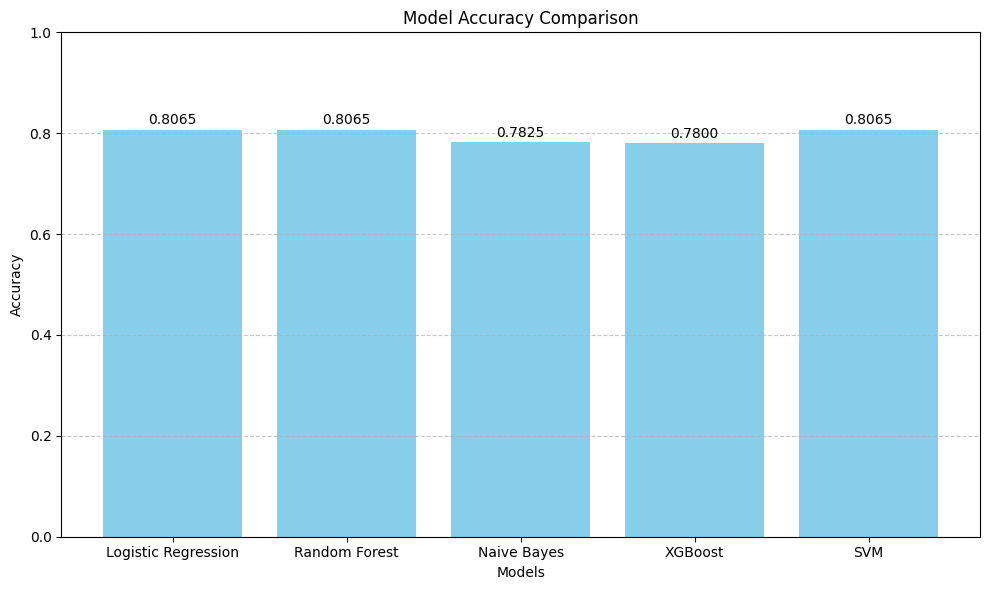

In [121]:
import matplotlib.pyplot as plt

model_names = ['Logistic Regression', 'Random Forest','Naive Bayes', 'XGBoost', 'SVM']
accuracies = [ 0.8065,0.8065,0.7825,0.78,0.8065]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.ylim(0, 1.0)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.4f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Select Random forest 

In [122]:

# Full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('randomforest', RandomForestClassifier(n_estimators=100,random_state=42))
])

In [138]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Exercise Habits',
                                                   'Smoking',
                                                   'Family Heart Disease',
                                                   'Diabetes',
                                                   'High Blood Pressure',
                                                   'Low HDL Cholesterol',
                                                   'High LDL Cholesterol',
                                                   'Alcohol Consumption',
                                                   'Stress Level',
                                                   'Sugar Consumption']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Blood Pressure',
                                                   'Cholesterol Level', 'BMI',
                                                   'Sleep Hours',
                                                   'Triglyceride Level',
                                                   'Fasting Blood Sugar',
                                                   'CRP Level',
                                                   'Homocysteine Level'])])),
                ('randomforest', RandomForestClassifier(random_state=42))])

In [139]:
y_pred=pipeline.predict(x_test)

In [140]:
print('accuracy ',accuracy_score(y_pred,y_test))

accuracy  0.8065


In [141]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

          No       1.00      0.81      0.89      2000
         Yes       0.00      0.00      0.00         0

    accuracy                           0.81      2000
   macro avg       0.50      0.40      0.45      2000
weighted avg       1.00      0.81      0.89      2000



In [142]:
import joblib

joblib.dump(pipeline,'Pipeline.pkl')

['Pipeline.pkl']